# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Kenny Lim
- Email: kennylim335@gmail.com
- Id Dicoding: Kenny Lim

## Menentukan Pertanyaan Bisnis
- Bagaimana performa bike sharing dari tahun 2011 ke 2012?
- Musim apa yang memperoleh jumlah rental sepeda terbanyak?
- Hari apa yang memperoleh jumlah rental sepeda terbanyak?

## Menyiapkan Semua Library yang Dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
### Gathering Data

In [3]:
day_df = pd.read_csv(r'C:\Users\kenny\Downloads\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


### Cleaning Data

In [5]:
day_columns = ["dteday"]
for column in day_columns:
    day_df[column] = pd.to_datetime(day_df[column])

day_columns2 = ['season']
for column in day_columns2:
    day_df[column] = day_df[column].astype(str)

day_columns3 = ['workingday']
for column in day_columns3:
    day_df[column] = day_df[column].astype(str)

day_columns4 = ['weekday']
for column in day_columns4:
    day_df[column] = day_df[column].astype(str)

day_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
day_df.yr.replace(0, 2011, inplace=True)
day_df.yr.replace(1, 2012, inplace=True)
day_df.season.replace('1', 'springer', inplace=True)
day_df.season.replace('2', 'summer', inplace=True)
day_df.season.replace('3', 'fall', inplace=True)
day_df.season.replace('4', 'winter', inplace=True)
day_df.workingday.replace('0', 'not working day', inplace=True)
day_df.workingday.replace('1', 'working day', inplace=True)
day_df.weekday.replace('0', 'sunday', inplace=True)
day_df.weekday.replace('1', 'monday', inplace=True)
day_df.weekday.replace('2', 'tuesday', inplace=True)
day_df.weekday.replace('3', 'wednesday', inplace=True)
day_df.weekday.replace('4', 'thursday', inplace=True)
day_df.weekday.replace('5', 'friday', inplace=True)
day_df.weekday.replace('6', 'saturday', inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,saturday,not working day,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,sunday,not working day,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,monday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,tuesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,wednesday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
day_df.describe()

,instant,dteday,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,0.028728,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,0.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


## Exploratory Data Analysis (EDA)

### Explore Jumlah Penyewaan Berdasarkan Tahun 2011 & 2012

In [8]:
day_df.groupby(by='yr').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


### Explore Jumlah Penyewaan Berdasarkan Musim

In [9]:
day_df.groupby(by='season').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


### Explore Jumlah Penyewaan Berdasarkan Hari

In [10]:
day_df.groupby(by='weekday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weekday,,,
friday,78238,409552,487790
monday,70784,384719,455503
saturday,153852,323955,477807
sunday,140521,303506,444027
thursday,61460,423935,485395
tuesday,57843,411266,469109
wednesday,57319,415729,473048


## Visualization & Explanatory Analysis

### Pertanyaan 1:

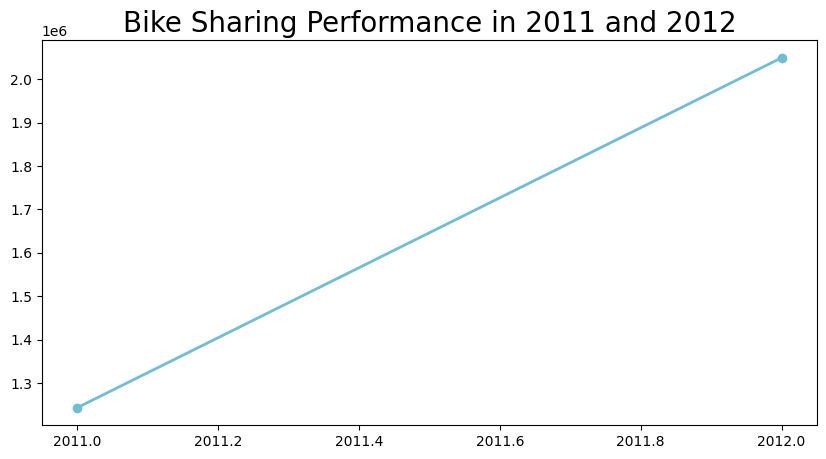

In [11]:
yearly_day_df = day_df.groupby("yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

yearly_day_df.rename(columns={
    "yr": "year",
    "cnt": "total_rental"
}, inplace=True)

plt.figure(figsize=(10, 5)) 
plt.plot(yearly_day_df["year"], yearly_day_df["total_rental"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Bike Sharing Performance in 2011 and 2012", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2:

C:\Users\kenny\AppData\Local\Temp\ipykernel_27272\1199719938.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rental", y="season", data=season_day_df, palette=colors, ax=ax)


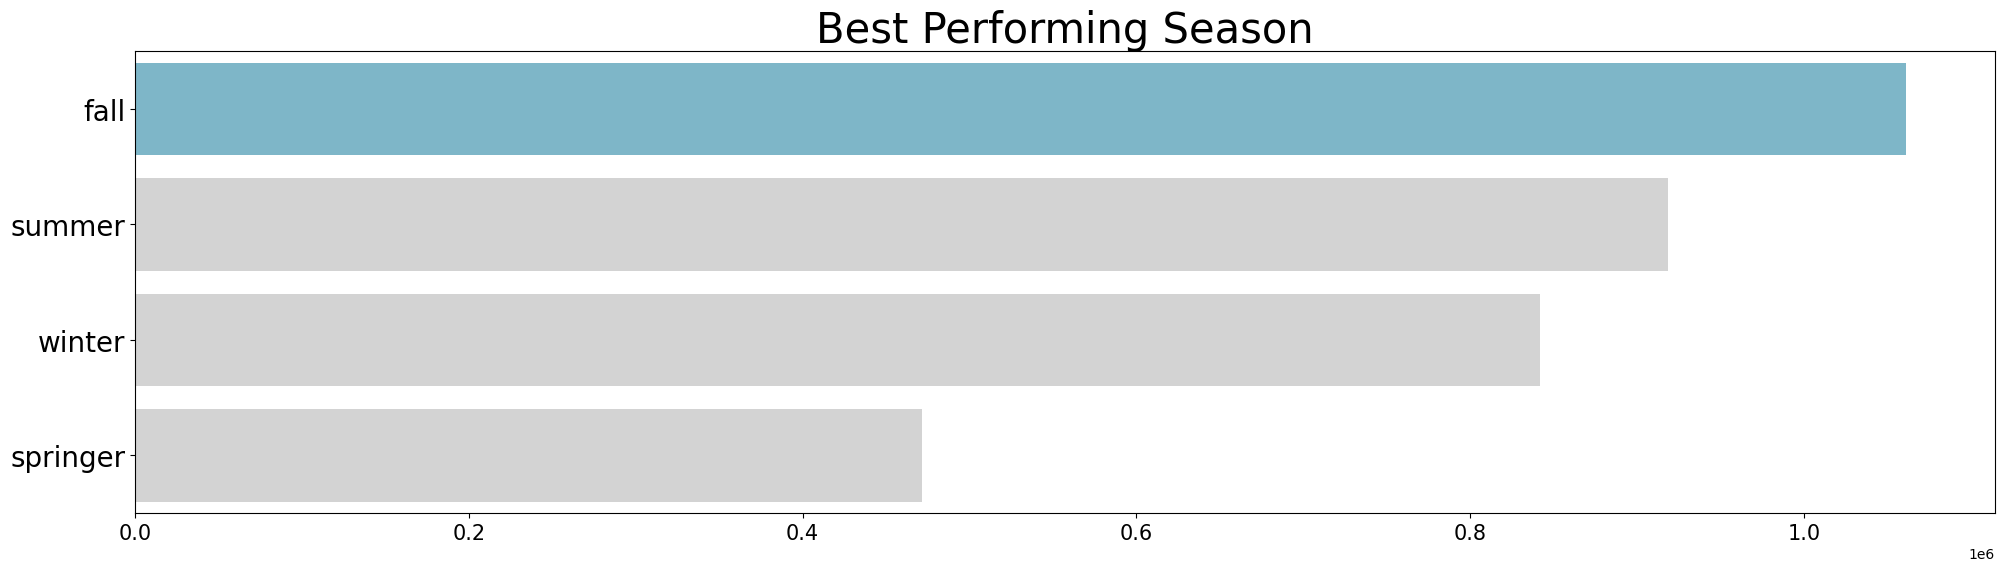

In [12]:
season_day_df = day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).cnt.sort_values(ascending=False).reset_index()

season_day_df.rename(columns={
    "cnt": "total_rental"
}, inplace=True)

fig, ax = plt.subplots(figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="total_rental", y="season", data=season_day_df, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Performing Season", loc="center", fontsize=30)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis = 'x', labelsize=15)

### Pertanyaan 3:

C:\Users\kenny\AppData\Local\Temp\ipykernel_27272\4026290291.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rental", y="weekday", data=weekday_day_df, palette=colors, ax=ax)


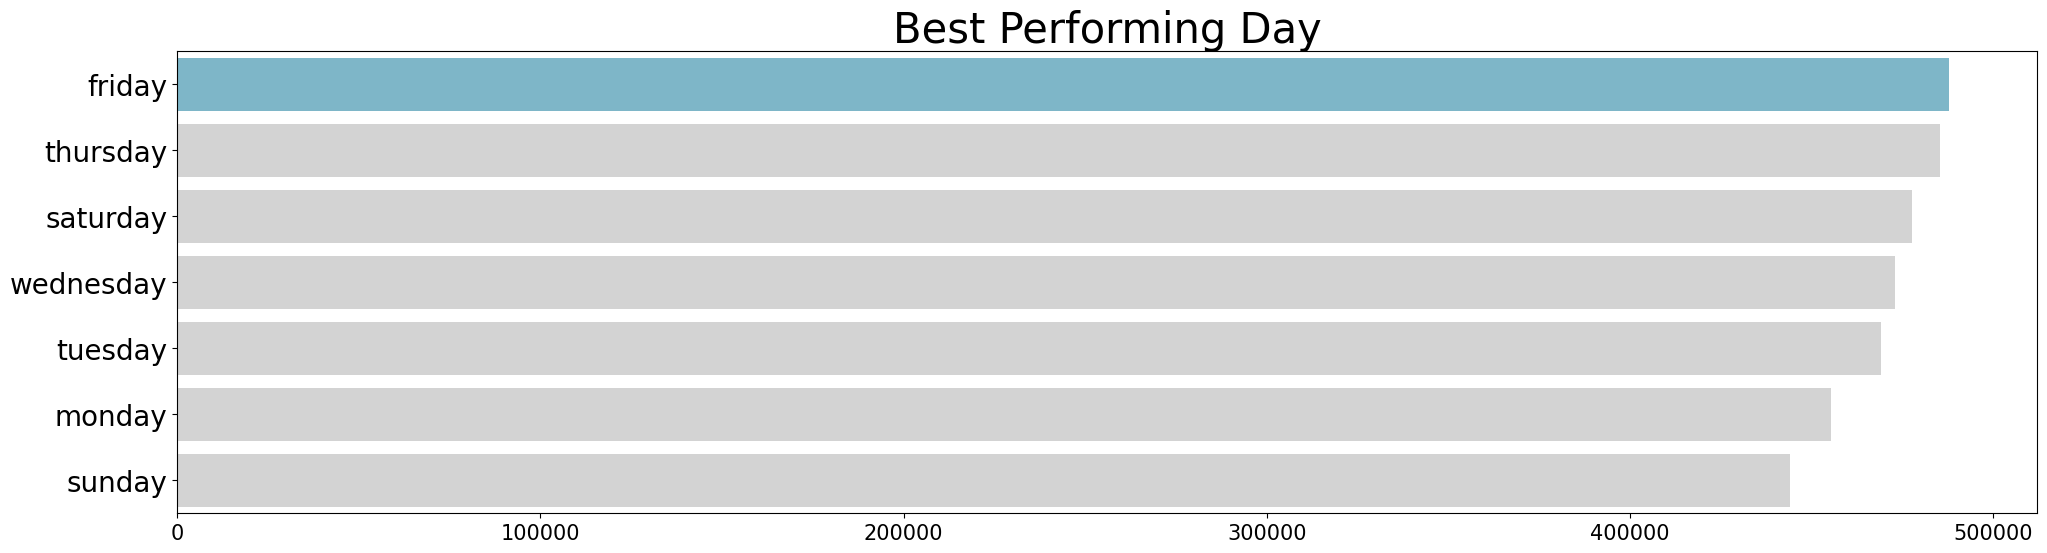

In [13]:
weekday_day_df = day_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).cnt.sort_values(ascending=False).reset_index()

weekday_day_df.rename(columns={
    "cnt": "total_rental"
}, inplace=True)

fig, ax = plt.subplots(figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="total_rental", y="weekday", data=weekday_day_df, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Best Performing Day", loc="center", fontsize=30)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis = 'x', labelsize=15)

## Conclusion
- Performa Bike Sharing mengalami peningkatan secara jumlah rental dari tahun 2011 ke 2012.
- Musim dengan jumlah rental terbanyak adalah musim gugur, diikuti musim panas, musim dingin, dan musim semi.
- Hari dengan jumlah rental terbanyak adalah hari Jumat, diikuti hari Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.